In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exercici 1. Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

In [3]:
lloguers_barcelona = pd.read_csv('/Users/juliacorominasfont/Downloads/preu lloguer per trimestre i barri.csv')
lloguers_barcelona.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [4]:
lloguers_barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [5]:
#Exploració columnes
lloguers_barcelona['Any'].unique()

array([2021])

In [6]:
lloguers_barcelona['Trimestre'].unique()

array([1, 2, 3, 4])

In [7]:
lloguers_barcelona['Codi_Districte'].nunique()

10

In [8]:
lloguers_barcelona['Codi_Barri'].nunique()

73

In [9]:
lloguers_barcelona['Lloguer_mitja'].value_counts()

Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: Lloguer_mitja, dtype: int64

El dataset conté 584 registres i 8 columnes referents a les següents variables:

- Any: 2021 en tots els casos
- Trimestre: de l'1 al 4.
- Codi_Districte: hi ha un total de 10
- Nom_Districte: hi ha un total de 10
- Codi_Barri: hi ha un total de 73
- Nom_Barri: hi ha un total de 73
- Lloguer_mitja: que indica si el preu fa referència al lloguer mitjà mensual o al preu per metre quadrat. Hi ha 292 registres per cada grup, que és el resultat de multiplicar els 73 barris pels 4 trimestres.
- Preu: mensual o per metre quadrat.

Cap de les variables té valors faltants.

#### Resum estadístic

Abans que res, cal modificar el tipus de dada d'algunes variables per poder fer l'anàlisi. Les variables Codi_Districte i Codi_Barri no cal que s'emmagatzemin com a números enters, ja que tan sols serveixen per identificar el Districte o Barri i no es pot operar amb els seus valors. Pel contrari, la variable Preu ha de ser numèrica per poder operar i resumir estadísticament els valors que conté.

In [10]:
#Conversió de variables (casting)

lloguers_barcelona['Codi_Districte'] = lloguers_barcelona['Codi_Districte'].astype(str)
lloguers_barcelona['Codi_Barri'] = lloguers_barcelona['Codi_Barri'].astype(str)
lloguers_barcelona['Preu'] = pd.to_numeric(lloguers_barcelona['Preu'], errors='coerce', downcast='float')

lloguers_barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    object 
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    object 
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float32
dtypes: float32(1), int64(2), object(5)
memory usage: 34.3+ KB


#### 1.1 Gràfic d'una variable categòrica (Districte o Barri)

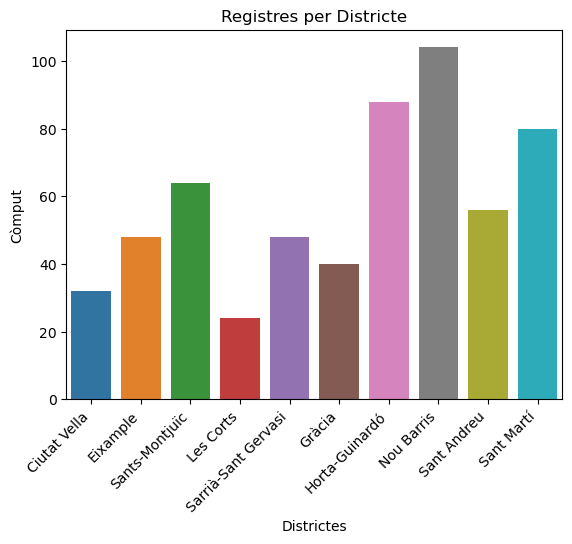

In [11]:
sns.countplot(data=lloguers_barcelona, x='Nom_Districte')
plt.title("Registres per Districte") 
plt.xlabel("Districtes")
plt.ylabel("Còmput")
plt.xticks(rotation=45, ha='right') 
plt.show()

El Districte Nou Barris és el que té més registres, superant els 100, mentres que el Districte Les Corts és el que en té menys, sense arribar als 30. Hi ha una diferència significativa entre els districtes.

L'anterior té sentit tenint en compte que el Districte de Nou Barris és el que té més barris i Les Corts el que en té menys:

In [12]:
barris_per_districte = lloguers_barcelona.groupby('Nom_Districte')['Codi_Barri'].nunique().to_frame()
barris_per_districte = barris_per_districte.sort_values(by='Codi_Barri', ascending=False)
barris_per_districte

,Codi_Barri
Nom_Districte,
Nou Barris,13
Horta-Guinardó,11
Sant Martí,10
Sants-Montjuïc,8
Sant Andreu,7
Eixample,6
Sarrià-Sant Gervasi,6
Gràcia,5
Ciutat Vella,4


#### 1.2 Una variable numèrica (Preu)

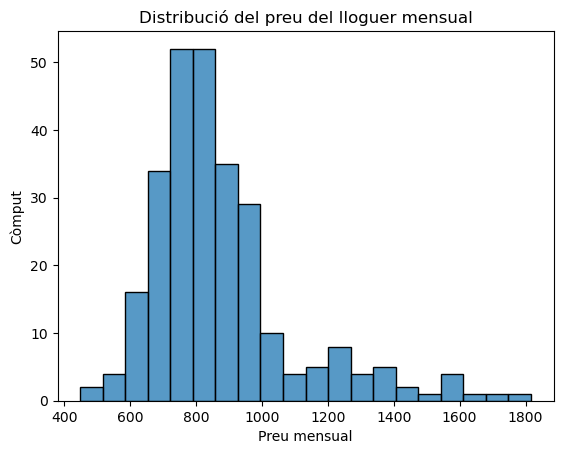

In [13]:
lloguer_mensual = lloguers_barcelona[lloguers_barcelona['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

sns.histplot(data=lloguer_mensual, x='Preu', bins=20)
plt.title('Distribució del preu del lloguer mensual')
plt.xlabel("Preu mensual")
plt.ylabel("Còmput")
plt.show()

La major part dels lloguers tenen un preu de 1000 o menys Euros mensuals. Hi ha alguns amb preus molt elevats que superen els 1800 Euros.

#### 1.3 Una variable numèrica i una categòrica (Districte i Preu)

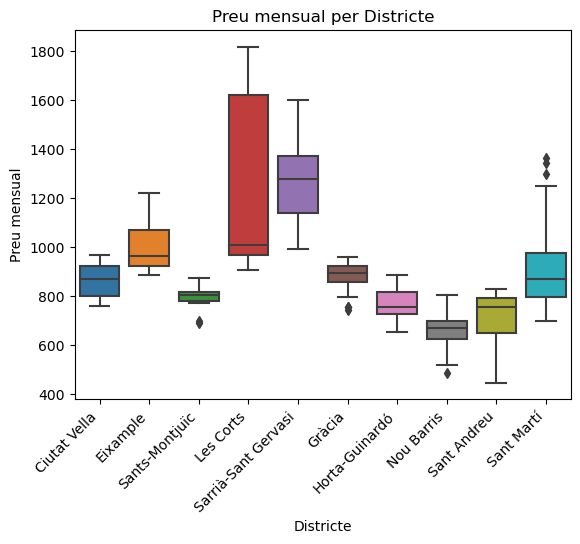

In [14]:
sns.boxplot(data=lloguer_mensual, x='Nom_Districte', y='Preu')
plt.title('Preu mensual per Districte')
plt.xlabel("Districte")
plt.ylabel("Preu mensual")
plt.xticks(rotation=45, ha='right') 
plt.show()

El Districte de Les Corts és el que té un rang de preus més ampli, però més de la meitat inclouen un preu de 1000€ o inferior. En el cas del Districte de Sarrià-Sant Gervasi, en canvi, el rang és més estret però la majoria dels preus oscil·len entre els 1200 i 1400€.

El Districte amb els preus més baixos és Nou Barris, seguit de Sant Andreu, encara que aquest últim inclou el preu més baix de tots.

#### 1.4 Dues variables numèriques (Any o Trimestre i Preu)

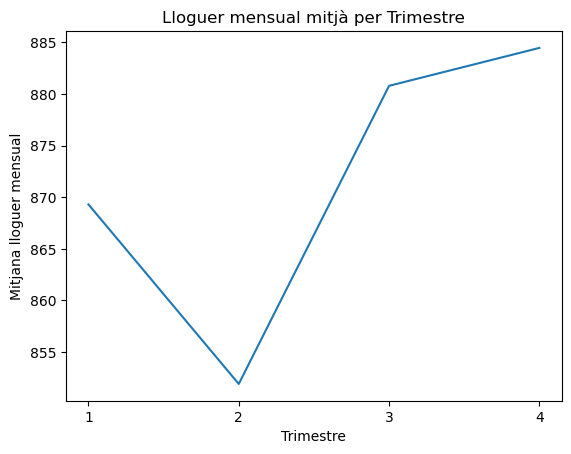

In [15]:
sns.lineplot(data=lloguer_mensual, x ='Trimestre', y = 'Preu', errorbar=None)
plt.title('Lloguer mensual mitjà per Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mitjana lloguer mensual')
plt.xticks([1, 2, 3, 4])
plt.show()

La mitjana del preu mensual és més alta en el tercer i quart trimestre, mentre que en el segon trimestre és quan és més baixa.

#### 1.5 Tres variables (Barri o Districte, Trimestre i Preu)

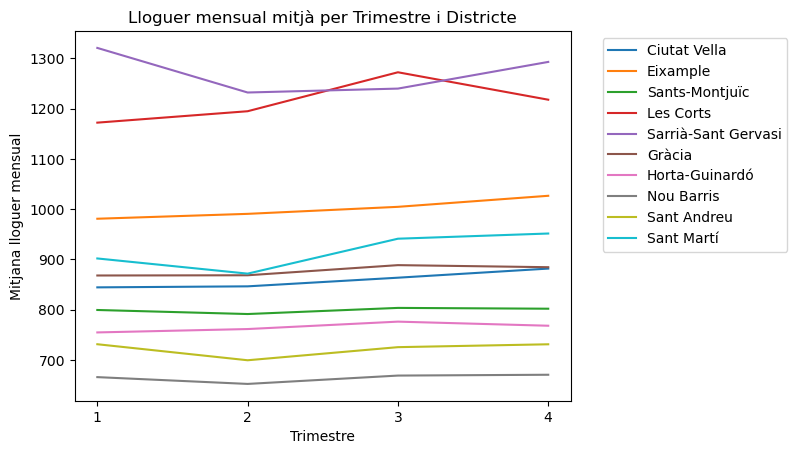

In [16]:
sns.lineplot(data=lloguer_mensual, x='Trimestre', y='Preu', hue='Nom_Districte', errorbar=None)
plt.title('Lloguer mensual mitjà per Trimestre i Districte')
plt.xlabel('Trimestre')
plt.ylabel('Mitjana lloguer mensual')
plt.xticks([1, 2, 3, 4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Per la majoria de Districtes el lloguer mensual mig és bastant estable en els diferents trimestres. Els Districtes que presenten més variabilitat són Les Corts, Sarrià-Sant Gervasi i Sant Martí. En el cas de Les Corts el preu mensual mitjà tendeix a augmentar fins el tercer trimestre i disminueix en el quart. En el Districte de Sarrià-Sant Gervasi el preu mig disminueix en els primers trimestres i augmenta en el quart. I en el cas del Districte de Sant Martí el preu disminueix el segon trimestre i augmenta en els dos següents.

#### Exercici 2. Exporta els gràfics com imatges o com HTML.

In [17]:
plt.savefig('Registres per Districte.png')
plt.savefig('Distribució del preu del lloguer mensual.png')
plt.savefig('Preu mensual per Districte.png')
plt.savefig('Lloguer mensual mitjà per Trimestre.png')
plt.savefig('Lloguer mensual mitjà per Trimestre i Districte.png')

<Figure size 640x480 with 0 Axes>

#### Exercici 3. Proposa alguna visualització que creguis que pot resultar interessant.

La visualització que proposo ens permet veure si hi ha o no alguna relació entre el Preu del metre quadrat i el Preu mensual del lloguer.

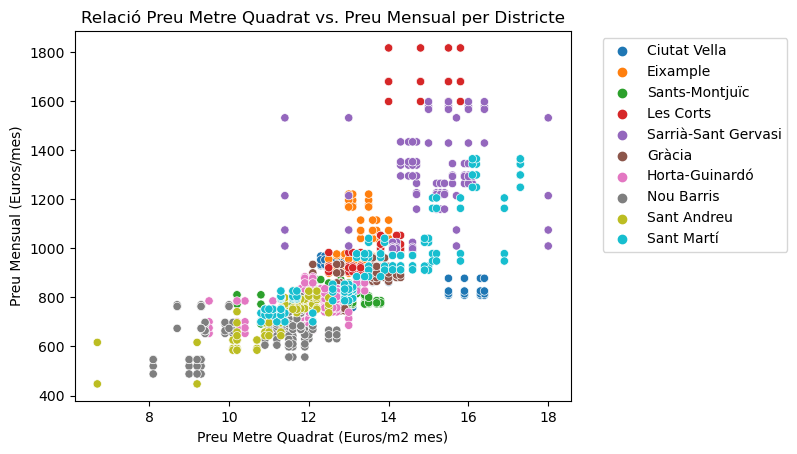

In [18]:
preu_metre_quadrat = lloguers_barcelona[lloguers_barcelona['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

preu_mensual_i_metre_quadrat = pd.merge(lloguer_mensual, preu_metre_quadrat, on=['Nom_Barri', 'Nom_Districte'], suffixes=('_mensual', '_metre_quadrat'))

sns.scatterplot(data=preu_mensual_i_metre_quadrat, x='Preu_metre_quadrat', y='Preu_mensual', hue='Nom_Districte')
plt.title('Relació Preu Metre Quadrat vs. Preu Mensual per Districte')
plt.xlabel('Preu Metre Quadrat (Euros/m2 mes)')
plt.ylabel('Preu Mensual (Euros/mes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Podríem dir que, en general, hi ha una relació entre el preu del metre quadrat i el preu de lloguer mensual. És a dir, a mesura que augmenta el preu del metre quadrat, augmenta el preu del lloguer mensual. No obstant, hi ha casos, especialment en els districtes de Les Corts, Sarrià-Sant Gervasi i Ciutat Vella, que els valors es desvien de la tendència general. 

L'anterior es tradueix en el següent: en el cas de Les Corts i Sarrià Sant-Gervasi els pisos solen tenir més metres quadrats, mentre que en el Districte de Ciutat Vella els pisos solen ser més petits. És per això que amb preus per metre quadrat similars els preus mensuals són tan dispars entre els dos primers i el tercer districte.

També podem observar que els districtes de Sant Andreu i Nou Barris són els que tenen el preu per metre quadrat més baix, mentre que Sarrià-Sant Gervasi és el districte amb els preus més alts. 

Per comparar millor els preus per metre quadrat entre els diferents districtes proposo el següent gràfic, similar a la visualització 1.3.

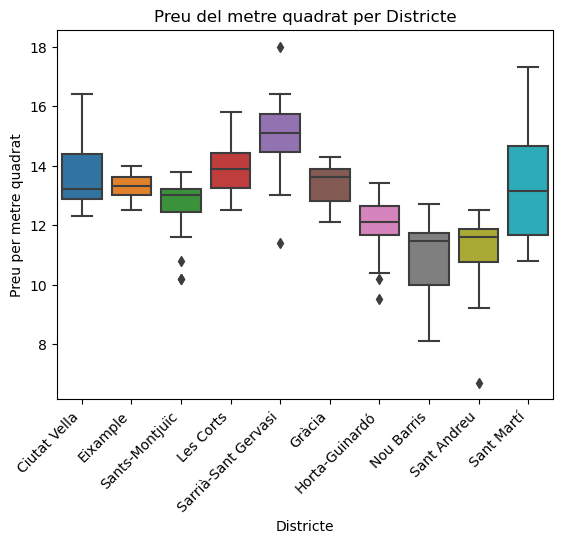

In [19]:
sns.boxplot(data=preu_metre_quadrat, x='Nom_Districte', y='Preu')
plt.title('Preu del metre quadrat per Districte')
plt.xlabel("Districte")
plt.ylabel("Preu per metre quadrat")
plt.xticks(rotation=45, ha='right') 
plt.show()

El diagrama de caixes confirma que els districtes de Nou Barris i Sant Andreu tenen el preu més baix per metre quadrat, mentre que el districte de Sarrià-Sant Gervasi és el que té els preus més alts, incloent en el seu conjunt el preu màxim per metre quadrat.